## Task: Measure chirality level from the image
Measures of quantifying twists in a 2D surface. (possible use of Frenet-Serret equations)
- Haussdorf Distance
- Osipov-Pickup-Dunner index
    - Related to intrinsic molecular chirality tensor
- Continuous chirality measure

First we load the xlsx data

In [1]:
import pandas as pd
from pathlib import Path
file_name = 'Front_EE-1_1_3000x_rings_coords.csv'
# csv_file = Path('/Users/rishabhkumar/spiral-chirals/vf_exports/Front_EE-1_1_3000x_rings_coords.csv')
csv_file = Path.cwd() / 'vf_exports' / file_name
with open(csv_file, 'r') as f:
    df = pd.read_csv(f)

print(df.head())
# Try to find any .xlsx in the current working directory
# xlsx_files = list(Path('.').glob('*.xlsx'))

# if not xlsx_files:
#     raise FileNotFoundError(
#         "No .xlsx files found in the current directory. "
#         "Set `xlsx_path` to the file you want to load."
#     )

# # If multiple files found, pick the first one (adjust if you want a specific file)
# xlsx_path = xlsx_files[0]
# print(f"Loading Excel file: {xlsx_path}")

# # Read the first sheet into a dataframe
# df = pd.read_excel(xlsx_path, engine='openpyxl')

# # Quick inspection
# print("DataFrame shape:", df.shape)
# display(df.head())
# df.info()

  Ring     Coordinate  Angle (α′)        Pattern
0    1   (7.00, 0.00)      -26.09      Clockwise
1    1  (0.00, -7.00)       58.86  Anticlockwise
2    1  (-7.00, 0.00)      -31.99      Clockwise
3    1   (0.00, 7.00)       73.30  Anticlockwise
4    2  (43.00, 0.00)      -11.86      Clockwise


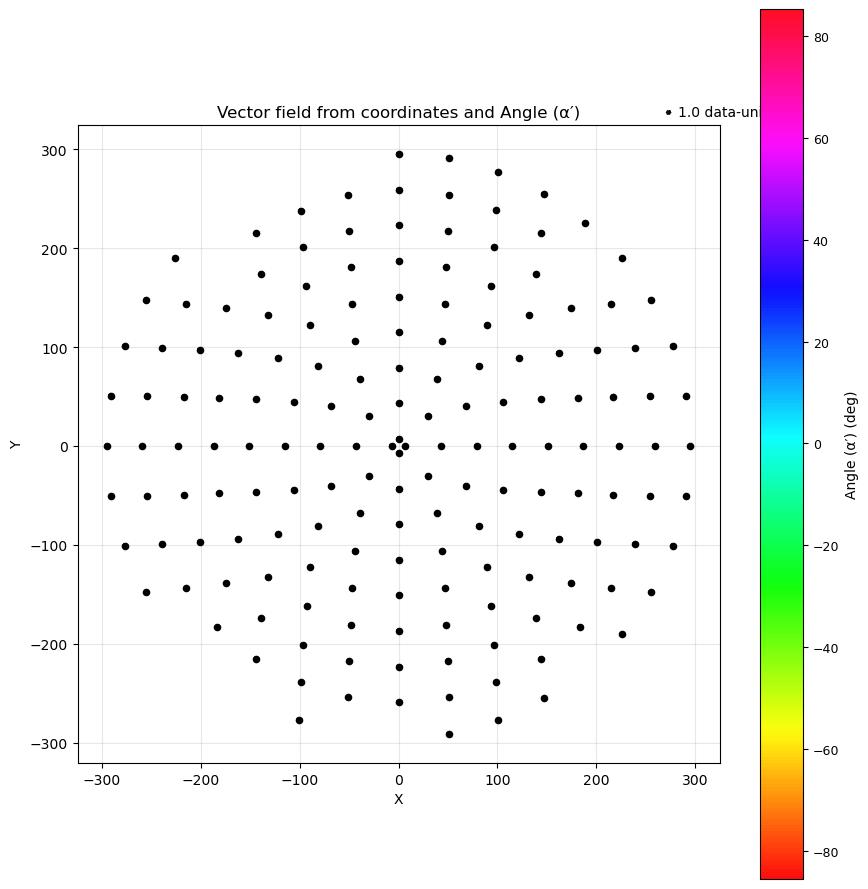

In [ ]:
# Extract angles and filter valid data
angles_deg = df[angle_col].values
X_plot = X[valid_mask]
Y_plot = Y[valid_mask]
angles_deg = angles_deg[valid_mask]

# Convert angles to radians and compute unit direction vectors
angles_rad = np.deg2rad(angles_deg)
U_plot = np.cos(angles_rad)
V_plot = np.sin(angles_rad)

# Compute a reasonable scale factor for the quiver key
scale_factor = np.round(np.percentile(np.sqrt(U_plot**2 + V_plot**2), 75), 1)
if scale_factor == 0:
    scale_factor = 1.0

# Create the plot
plt.figure(figsize=(9, 9))
magnitude_scale = 5.0
U_plot_scaled = magnitude_scale * U_plot
V_plot_scaled = magnitude_scale * V_plot

q = plt.quiver(
    X_plot, Y_plot, U_plot_scaled, V_plot_scaled, angles_deg,
    angles='xy', scale_units='xy', scale=1, cmap='hsv',
    width=0.08,
    headwidth=12,
    headlength=16,
    headaxislength=8,
    alpha=0.95, edgecolor='k', linewidth=0.3
)

plt.scatter(X_plot, Y_plot, c='k', s=20, zorder=3)

plt.gca().set_aspect('equal', 'box')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Vector field from coordinates and {angle_col}')

cbar = plt.colorbar(q, label=f'{angle_col} (deg)')
cbar.ax.tick_params(labelsize=9)

plt.quiverkey(q, X=0.92, Y=1.02, U=scale_factor,
              label=f'{scale_factor} data-units', labelpos='E',
              fontproperties={'size':10})

plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('vector_field_plot.svg', dpi=300)
plt.show()
